<a href="https://colab.research.google.com/github/dbalstjr16/personalProject/blob/main/machineLearningTraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#The Perceptron Algorithm
#Frank Rosenblatt suggested this algorithm:

#Set a threshold value
#Multiply all inputs with its weights
#Sum all the results
#Activate the output


inputs = [1, 0, 1, 0, 1];
weights = [0.7, 0.6, 0.5, 0.3, 0.4];

sum = 0

threshold = 15;

for i in range(len(inputs)):
  sum += inputs[i] * weights[i]

if sum > threshold:
  print(True)
else:
  print(False)

True


In [17]:
#Attempt to train a perceptron to determine points over and under the line.

import random

class Perceptron:
    def __init__(self, no, learningRate=0.00001):
        # Set Initial Values
        self.learnc = learningRate
        self.bias = 1

        # Compute Random Weights
        self.weights = [random.uniform(-1, 1) for _ in range(no + 1)]

    # Activate Function
    def activate(self, inputs):
        sum = 0
        for i in range(len(inputs)):
            sum += inputs[i] * self.weights[i]
        return 1 if sum > 0 else 0

    # Train Function
    def train(self, inputs, desired):
        inputs.append(self.bias)
        guess = self.activate(inputs)
        error = desired - guess
        if error != 0:
            for i in range(len(inputs)):
                self.weights[i] += self.learnc * error * inputs[i]

# End Perceptron Class


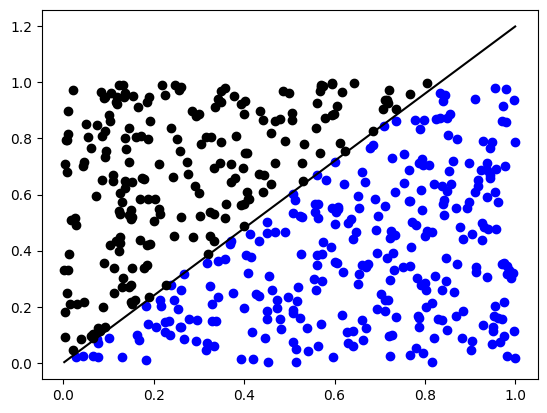

In [18]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Initiate Values
numPoints = 500
learningRate = 0.00001

# Create Random XY Points
xPoints = np.random.rand(numPoints)
yPoints = np.random.rand(numPoints)

# Line Function
def f(x):
    return x * 1.2

# Plot the Line
xMin = min(xPoints)
xMax = max(xPoints)
yMin = f(xMin)
yMax = f(xMax)
plt.plot([xMin, xMax], [yMin, yMax], color='black')

# Compute Desired Answers
desired = np.where(yPoints > f(xPoints), 1, 0)

# Create a Perceptron
ptron = Perceptron(2, learningRate)

# Train the Perceptron
for _ in range(10000):
    for i in range(numPoints):
        ptron.train([xPoints[i], yPoints[i]], desired[i])

# Display the Result
for i in range(numPoints):
    x = xPoints[i]
    y = yPoints[i]
    guess = ptron.activate([x, y, ptron.bias])
    color = 'blue' if guess == 0 else 'black'
    plt.scatter(x, y, color=color)

plt.show()
